# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
# Load dataset
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Lihat 5 baris teratas
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


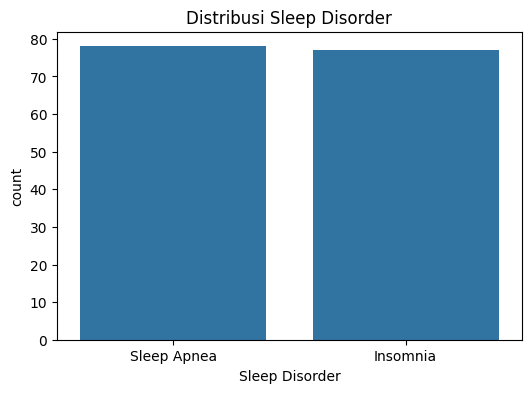

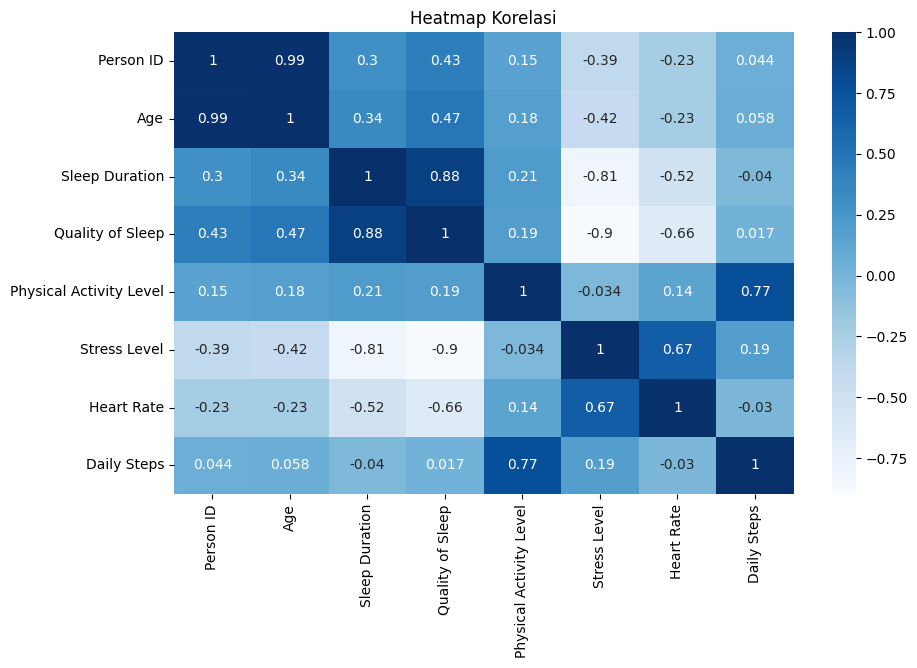

In [3]:
#Type your code here
# Info dataset
df.info()

# Cek missing values
df.isnull().sum()

# Statistik numerik
df.describe()

# Cek distribusi target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Disorder')
plt.title('Distribusi Sleep Disorder')
plt.show()

# Korelasi fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# 1. Menghapus Duplikasi (Sesuai Kriteria Preprocessing)
print("Jumlah duplikasi sebelum:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah duplikasi setelah:", df.duplicated().sum())

# 2. Menghapus kolom yang tidak relevan/tidak numerik sederhana
# 'Person ID' adalah index unik, 'Blood Pressure' memiliki format string "120/80"
# yang akan merusak model jika tidak diproses khusus.
df = df.drop(['Person ID', 'Blood Pressure'], axis=1)

# 3. Handling Categorical Columns (Encoding)
# Daftar kolom kategorikal sesuai dataset
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

le = LabelEncoder()
for col in cat_cols:
    # Memastikan data bertipe string sebelum di-encode
    df[col] = le.fit_transform(df[col].astype(str))

# 4. Split fitur & target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nShape X_train:", X_train.shape)
X_train.head()

Jumlah duplikasi sebelum: 0
Jumlah duplikasi setelah: 0

Shape X_train: (299, 10)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
192,1,43,7,6.5,6,45,7,3,72,6000
75,1,33,1,6.0,6,30,8,0,72,5000
84,1,35,9,7.5,8,60,5,1,70,8000
362,0,59,5,8.2,9,75,3,3,68,7000
16,0,29,5,6.5,5,40,7,1,80,4000


In [5]:
import os

os.makedirs("preprocessing/namadataset_preprocessing", exist_ok=True)
out_path = "preprocessing/namadataset_preprocessing/data_bersih_eksperimen.csv"

df.to_csv(out_path, index=False)
print("Saved:", out_path, "shape:", df.shape)

Saved: preprocessing/namadataset_preprocessing/data_bersih_eksperimen.csv shape: (374, 11)
